<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_YB_week2_2_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##10 _ 시각화

####03 시본(Seaborn)

**[시각화를 위한 차트/그래프 유형]**



*   비즈니스 분석을 위한 시각화: 청중의 유형, 수준, 설득이 필요한 다양한 환경에 따라서 적절하게 여러 차트를 활용
*   데이터 자체가 가지는 특성에 좀 더 집중하여 데이터 자체가 가지는 통계적인 특성을 설명하기 위해 시각화를 동원해야 할 필요가 있음



**[정보의 종류에 따른 시각화 차트 유형]**



*   히스토그램: 연속형 값에 대한 도수 분포 -> X축: 도수 분포를 원하는 연속형 값의 구간 / Y축: 해당 구간의 도수 분포
*   바 플롯: 특정 칼럼의 이산 값에 따른 다른 칼럼의 연속형 값을 막대 그래프 형태로 시각화 -> X축: 특성 칼럼의 이산값 / Y값: 다른 칼럼의 연속형 값
*   박스 플롯: 연속형 값의 사분위 IQR, 최대, 최소, 이상치 값을 시각화
*   바이올린 플롯: 히스토그램의 연속 확률 분포 곡선, 박스 플롯을 바이올린 형태로 함께 시각화
*   스캐터 플롯: 산점도 - 2개의 연속형 값들을 X, Y 좌표상의 점으로 시각화
*   상관 히트맵: 다수의 연속형 칼럼들에 대해 상호 간의 상관 관계 시각화


**[히스토그램{Histogram)]**
*   막대 차트처럼 보이지만 연속형 값을 범위 또는 구간으로 그룹화해 개별 구간에 해당되는 데이터 건수를 시각화

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [3]:
import pandas as pd

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

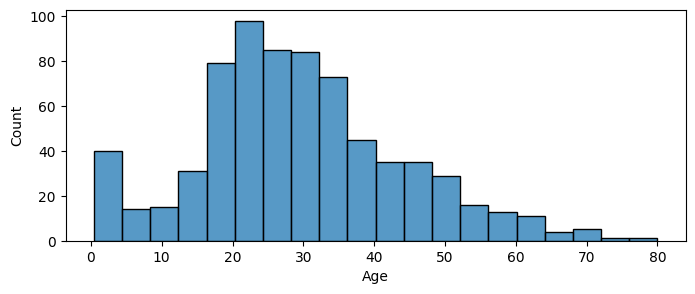

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본에서도 plt.figure()의 figsize 인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(8, 3))

# DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당, ylabel 값은 Count로 설정.
sns.histplot(titanic_df['Age'], bins=20)
plt.show()



*   20개 Bin 구간에 따라 연속으로 이어진 막대 그래프 형태의 도수 분포를 가지는 히스토그램
*   시본의 많은 시각화 함수들은 판다스 DataFrame에 잘 통합되어 있어 X축, Y축 각각에 칼럼명을 입력받아서 처리할 수 있도록 설계되어 있음



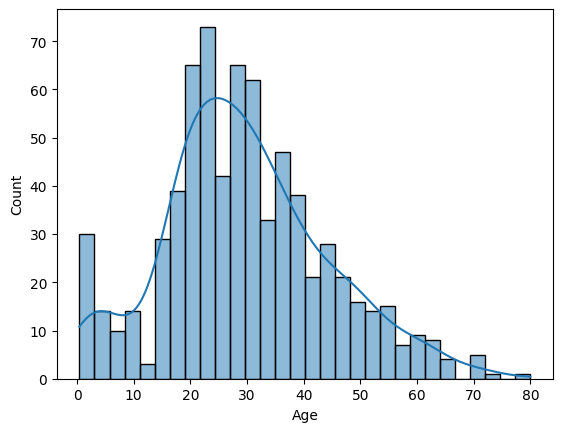

In [5]:
sns.histplot(x='Age', data=titanic_df, bins=30, kde=True)
plt.show()



*   dispolot( ): Figure  레벨 함수 - 맷플롯립 API 사용 최소화, 기본 맷플롯립에서 사용하는 기능들을 Figure 레벨 함수 인자 등으로 대체하게 설계


<Figure size 800x400 with 0 Axes>

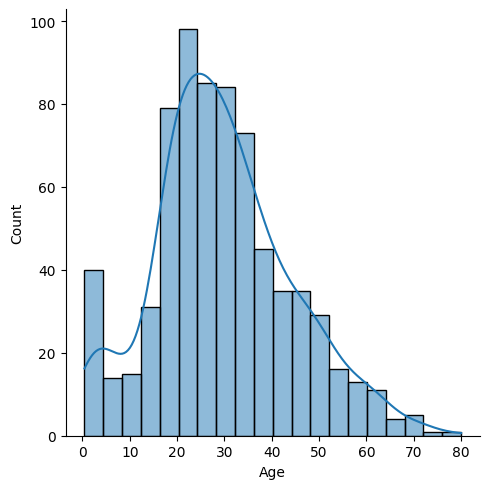

In [6]:
import seaborn as sns


# seaborn의 figure레벨 그래프는 plt.figure( )로 Figure 크기를 조절할 수 없습니다.
plt.figure(figsize=(8, 4))
sns.displot(x='Age', data=titanic_df, kde=True)
plt.show()



*   plt.figure(figsize=(8,4))로 가로 길이를 8, 세로 길이를 4로 설정하여 가로가 세로의 2배 크기가 되도록 Figure를 설정했지만 오히려 세로가 더 큰 히스토그램을 만들어짐 => 시본의 Figure 레벨 함수를 사용하면 plt.figure( )를 이용하여 Figure의 크기를 조절할 수 없기 때문
*   displot( ) 함수의 height- 세로(높이) 크기, aspect- 가로와 세로의 배율



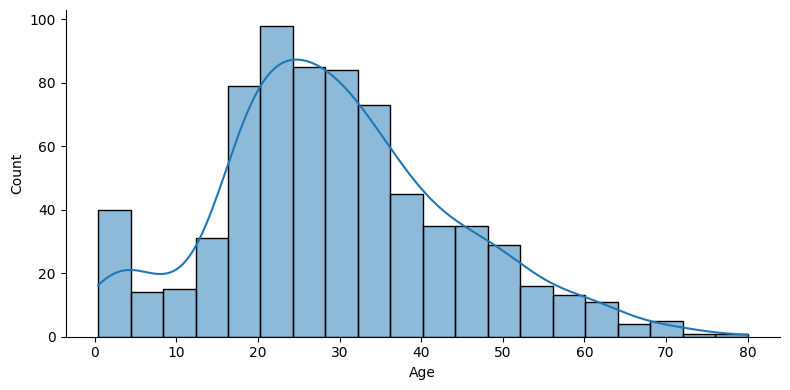

In [7]:
import seaborn as sns


sns.displot(titanic_df['Age'], kde=True, height=4, aspect=2)
plt.show()



*   시본의 Figure 레벨 함수는 그래프의 세부적인 변경이 다소 어려우나 여러 시각화 함수들을 한 번에 시각화할 수 있는 다양한 장점이 있음



**[카운트 플롯]**



*   카운트 플롯: 이산형 값의 건수를 막대 그래프 형태로 시각화 - 주로 카테고리성 칼럼 값별 건수를 시각화
*   시본의 countplot( ) 사용




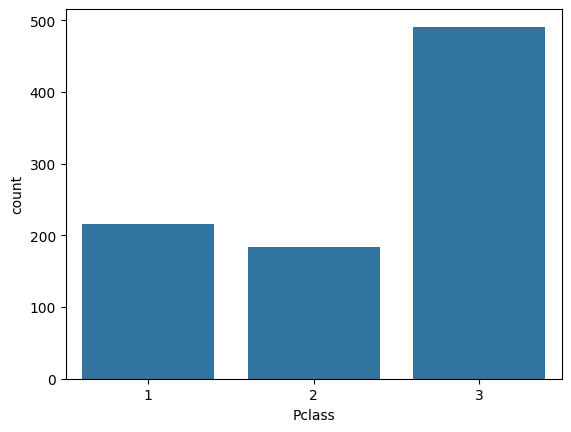

In [8]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

**[바 플롯(barplot)]**



*   간단한 시각화이지만 2차원 축 기반의 시각화에 널리 활용
*   Y축 값은 Y축에 해당하는 칼럼값의 평균이나 총합으로 표현되는 연속형 값을 가짐(수평 막대 그래프의 경우 반대)



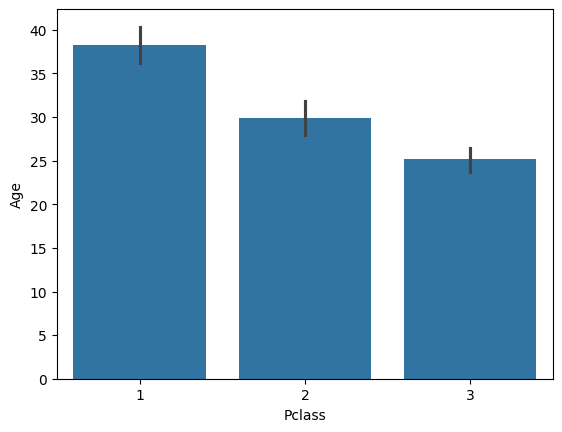

In [9]:
# 자동으로 xlabel, ylabel을 barplot( )의 x 인자값인 Pclass, y 인자값이 Age로 설정.
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()



*   barplot( ) 함수: 기본적으로 Y축의 평균 값을 나타냄 (평균 이외에도 총합, 중앙값 등도 가능)



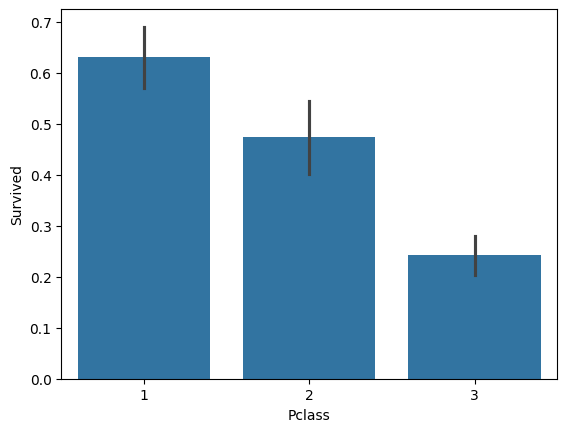

In [10]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.show()



*   barplot( ) 함수: 수직/수평 막대 그래프 시각화 선택을 orient 인자로 설정
*   orient가 v - 수직(vertical) 막대 그래프, h - 수평(horizontal) 막대 그래프
*   X축 값과 Y축 값 데이터 유형을 판단하여 자동으로 수직/수평 막대 그래프를 그려주지만 값이 모두 숫자형 값이면 수직 막대 그래프를 우선하여 그려줌
*   수직 막대 그래프의 경우 X축 값을 이산형 값(숫자값/문자열값)으로 설정하며 Y축 값을 문자열 값으로 설정해서는 아됨



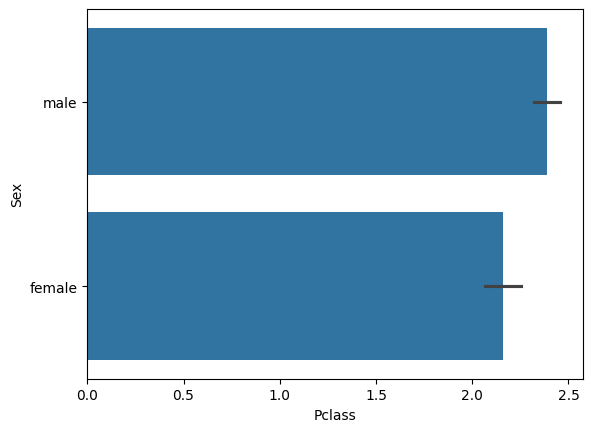

In [11]:
### y축을 문자값으로 설정하면 자동을 수평 막대 그래프 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)
plt.show()

*   바 플롯의 수직 막대 그래프의 경우 Y축 값을 연속형 값으로, 수평 막대 그래프의 경우 X축 값을 연속형 값으로 설정해 줘야 시각적으로 정보가 의미하는 바를 명확하게 파악할 수 있음

<Axes: xlabel='Name', ylabel='Sex'>

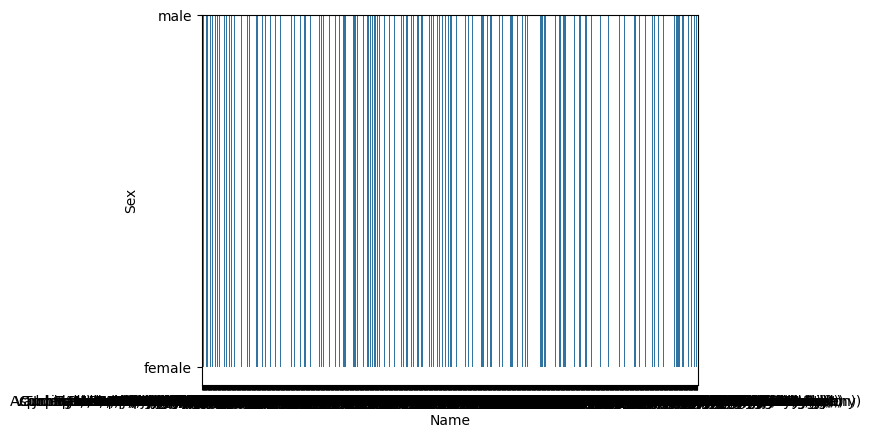

In [12]:
# x 인자로 문자열인 Name을, y 인자로 문자열인 Sex를 입력하므로 barplot은 오류를 발생.
sns.barplot(x='Name', y='Sex', data=titanic_df)

<ipython-input-13-f04ab605102e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)


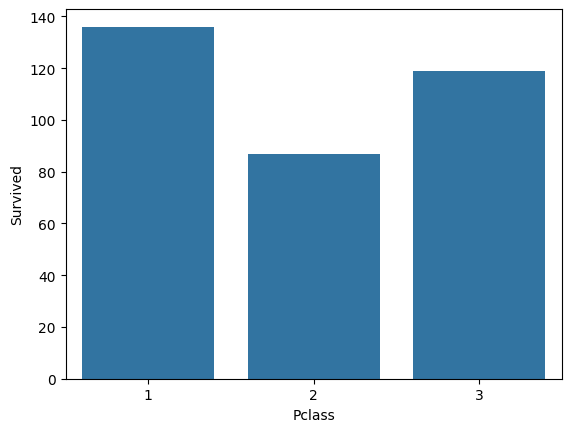

In [13]:
# estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)
plt.show()

**[barplot() 함수의 hue 인자를 사용하여 시각화 정보를 추가적으로 세분화하기]**

*   barplot() 함수 hue 인자: 세분화된 비교 정보를 추가적으로 전달 가능

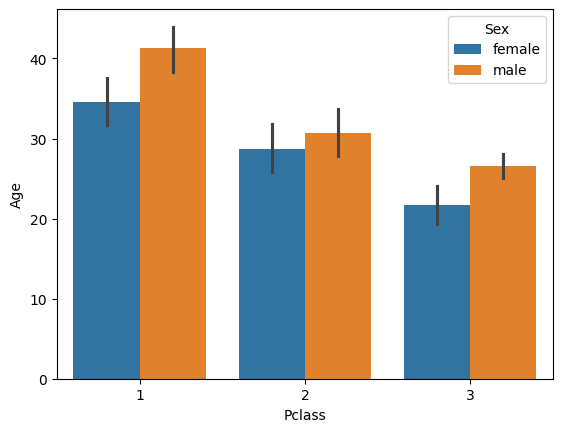

In [14]:
# 아래는 Pclass가 X축값이며 hue파라미터로 Sex를 설정
# 개별 Pclass 값별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

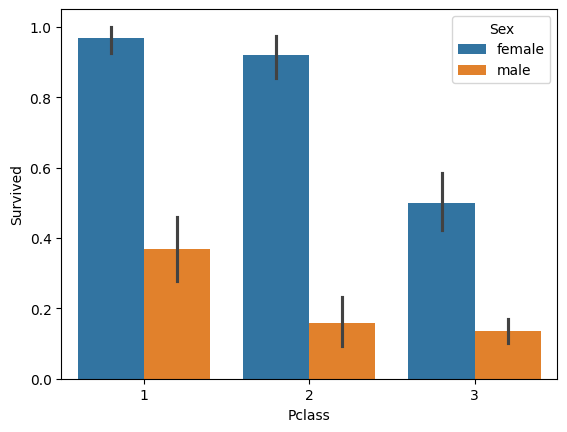

In [15]:
# 개별 Pclass 값별로 Sex에 따른 Survived 평균값을 구함.
# Pclass 가 X축 값이며 Survived가 Y축 값, hue 파라미터로 Sex를 설정
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

**[박스 플롯]**

*   박스 플롯/상자 수염 그래프: 상자 형태로 생긴 몸통 부분과 위, 아래로 길게 이어진 수염 형태로 이뤄져 있기 때문
*   x 또는 y 인자로 연속형 값을 입력할 수 있음 => y에 입력: 수직 박스 플롯, x에 입력: 수평 박스 플롯

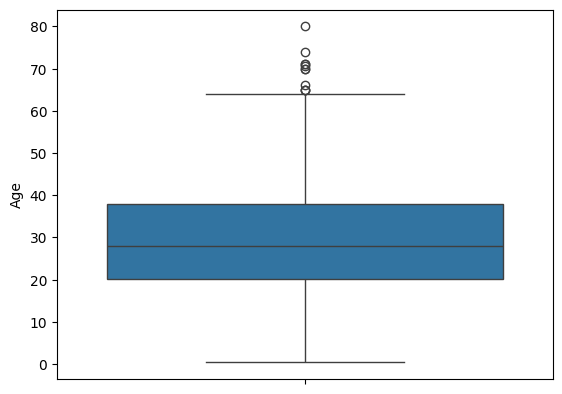

In [16]:
sns.boxplot(y='Age', data=titanic_df)
plt.show()

*   단일 칼럼에 대한 분위수를 기반으로 하며 추가적인 세분화 레벨에서도 적용 가능

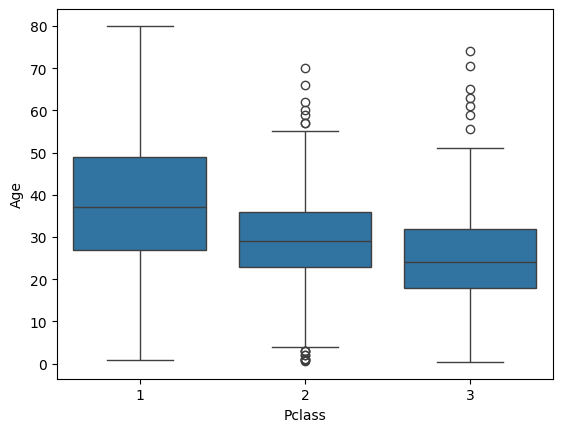

In [17]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

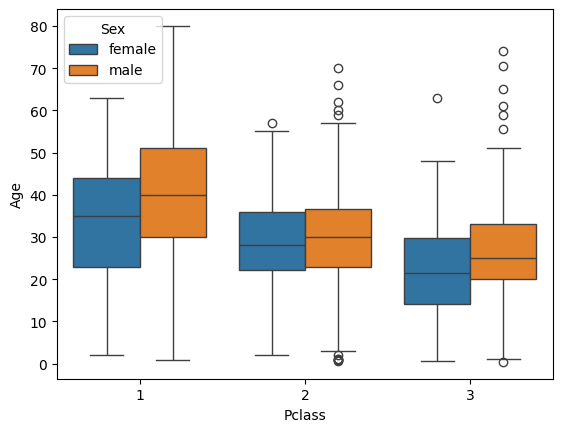

In [18]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

**[바이올린 플롯]**

*   바이올린 플롯: 히스토그램의 연속 확률 분포 곡선, 박스 플롯을 함께 시각화 가능
*   y에 연속형 값 입력: 수직 바이올린 플롯, x에 연속형 값 입력: 수평 바이올린 플롯

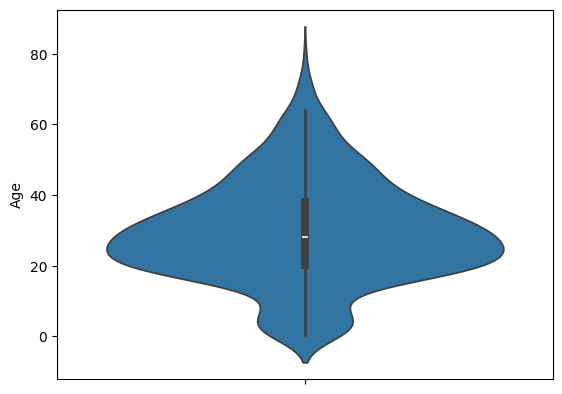

In [19]:
# Age 칼럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

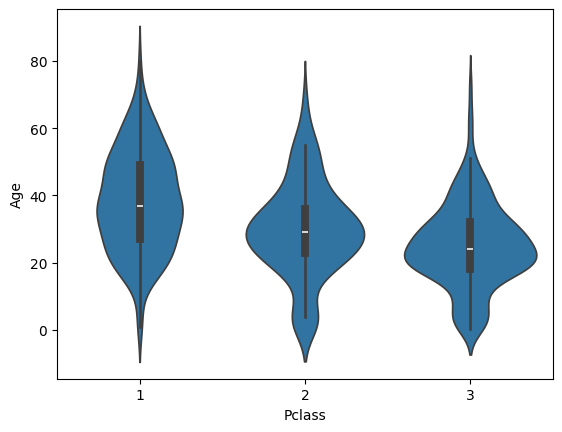

In [20]:
# x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
# pClass값별 Age 데이터 분포를 비교하여 볼 수 있음.
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

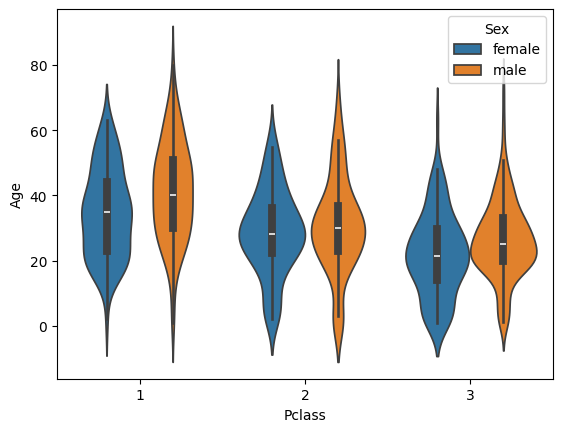

In [21]:
# x축값인 개별 Pclass 내에서 Sex값별로 y축 값인 Age의 바이올린 플롯을 그림
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

*   시본의 hisplot( ) 함수는 hue 기능을 제공하지만 violinplot( ) 함수가 특정 이산값에 해당하는 연속형 값의 데이터 분포도를 훨씬 효과적으로 시각화하여 데이터 분석 시 활용도가 높음

**[subplots를 이용하여 시본의 다양한 그래프를 시각화]**

*   모든 Axes 레벨 시각화 함수는 ax라는 인자를 가져 시각화 함수 호출 시 ax인자에 개별 Axes 객체를 할당

index: 0
index: 1
index: 2


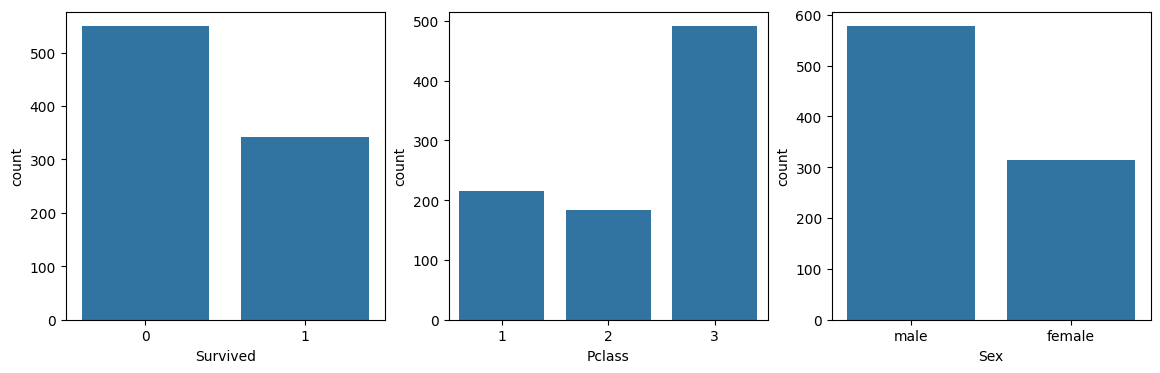

In [22]:
cat_columns = ['Survived', 'Pclass', 'Sex']

# nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    print('index:', index)
    # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.countplot(x=column, data=titanic_df, ax=axs[index])

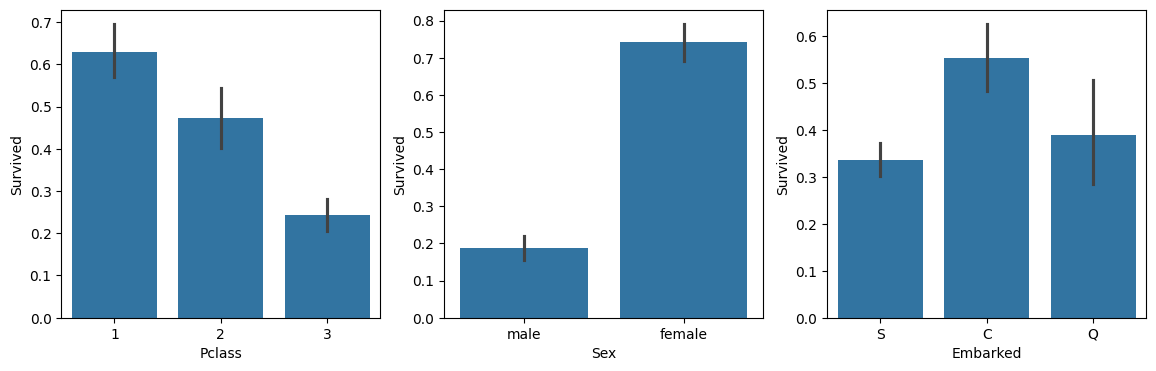

In [23]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

# nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axs = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14, 4))

for index, column in enumerate(cat_columns):
    # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
    sns.barplot(x=column, y='Survived', data=titanic_df, ax=axs[index])

*  여러 개의 서브플롯을 이용하면 여러 개 칼럼들에 대한 시각화 정보를 한꺼번에 확인하고 비교해볼 수 있으므로 단일 플롯을 사용할 때보다 더욱 유용
*   머신러닝 데이터 세트의 개별 피처 칼럼들이 서로 다른 타깃값별로 어떻게 구성되고 데이터가 분포되는지 확인하는 작업 머신러닝 데이터 탐색 과정에서 매우 중요

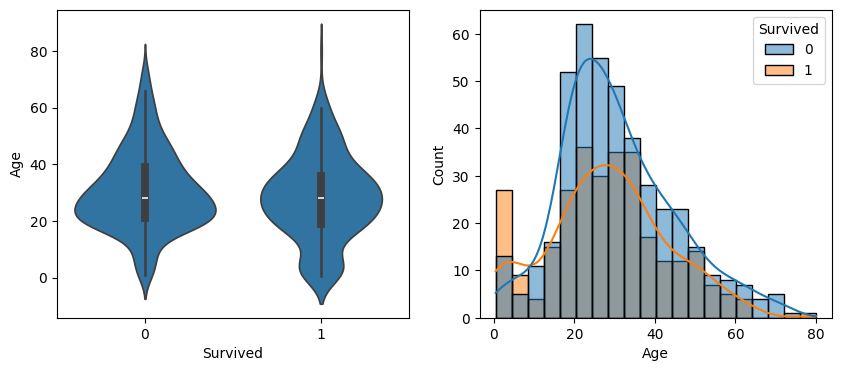

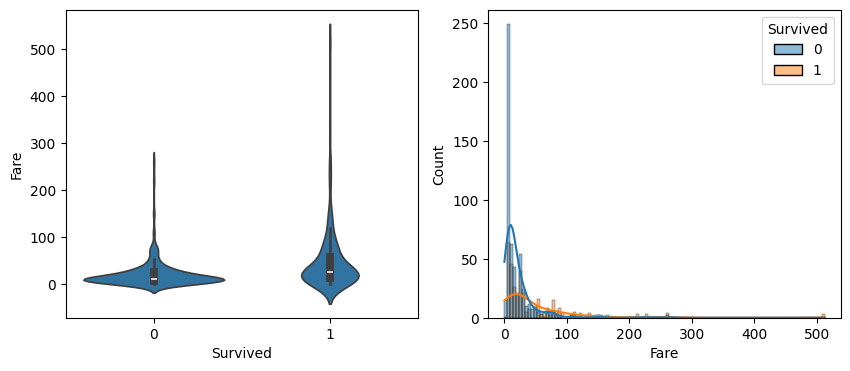

In [24]:
cont_columns = ['Age', 'Fare']

# 리스트로 할당된 칼럼들의 개수만큼 루프 수행.
for column in cont_columns:
    # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화, nrows는 1, ncols=2인 서브플롯 생성.
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    # 왼쪽 Axes 객체에는 Survived값 0, 1별 개별 칼럼의 바이올린 플롯 시각화.
    sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
    # 오른쪽 Axes 객체에는 Survived값에 따른 개별 칼럼의 히스토그램 시각화
    sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])



*   매우 많은 칼럼들의 서브플롯을 한꺼번에 만드는 방식보다는 서로 다른 그래프로 시각화할 서브플롯 두 개를 개별 칼럼별로 할당하고 모든 칼럼에 순차적으로 반복하여 적용하는 방식이 더 쉬운 시각화 코드를 만들 수 있음
*   앞서 분석한 Sex별 생존율과 결합해서 살펴보면 남성이면서 20대 초중반 승객이 상대적으로 많이 사망했음
*   요금이 낮을수록 선실 등급이 낮고 생존율이 낮았음



**[산점도, 스캐터 플롯(Scatter Plot]**

산점도/스캐터 플롯(Scatter Plot): 좌표사에 점을 표시하여 변수 간의 관계를 나타내며 2차원 축, X축에 해당하는 변숫값과 Y축에 해당하는 변숫값이 만나는 지점에 점을 표시하여 변수 간의 관계를 시각화

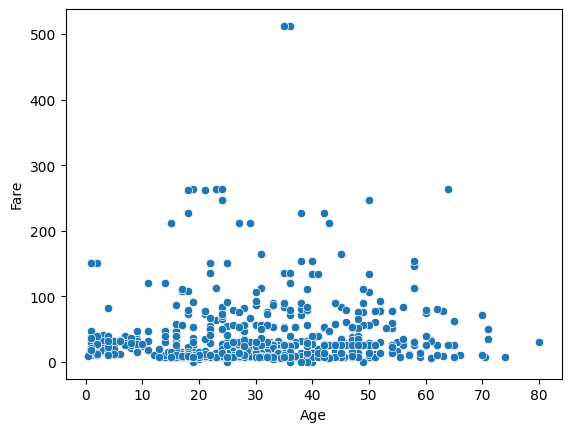

In [25]:
# X축값으로 Age, Y축값으로 Fare를 설정
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

*   100이하의 낮은 요금이 전 연령대에 걸쳐 분포되어 있음

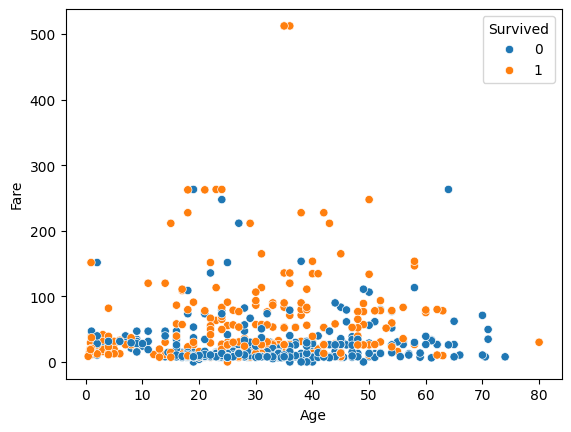

In [26]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

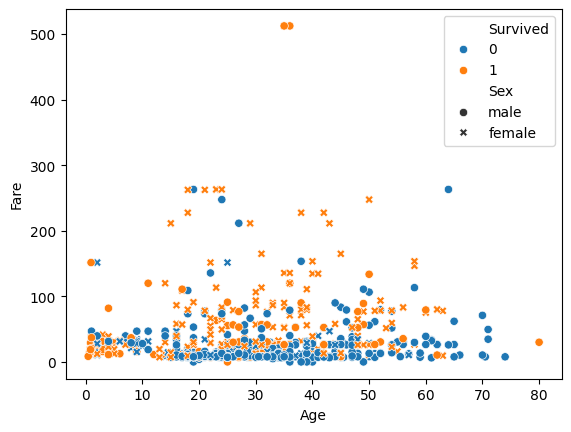

In [27]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

*   X축 Age, Y축 Fare 로 표현되는 점들이 사망/생존은 파란색, 주황색으로 구분
*   성별은 남성이 원 모양, 여성이 엑스 모양으로 구분
*   scatterplot() 함수는 hue, style 인자로 좀 더 세분화된 구분을 가능하게 함

**[상관 히트맵(Correlation Heatmap]**

*   상관 히트맵: 다수의 속성들 간의 상관계수를 히트맵(Heat+map, 수치값을 온도를 연상시키는 다양한 색상으로 표현)형태로 나타냄
*   다수의 칼럼들 간 상관 계수를 온도를 연상시키는 여러 가지 색상으로 표현하여 직관적으로 칼럼들 간의 상관도를 이해할 수 있도록 하는 시각화 기법

In [28]:
titanic_numeric_df = titanic_df.select_dtypes(include=[float, int])
corr_df = titanic_numeric_df.corr()
corr_df

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

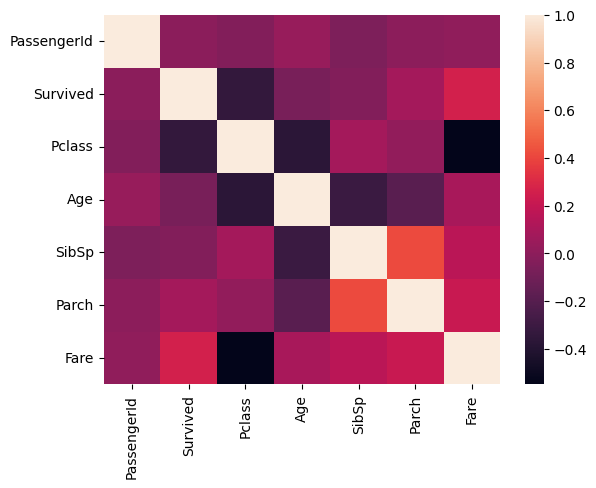

In [29]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력
corr = titanic_numeric_df.corr()
sns.heatmap(corr)
plt.show



*   맨 오른쪽에 -1~1 사이의 숫자값(상관계숫값)에 해당하는 색깔 기준이 온도계와 같은 형태로 표현
*   -1에 가까울수록 검은색, 0으로 갈수록 빨간색, 1에 가까울수록 밝은 베이지색
*   cmap 인자: color map => 히트맵의 색상을 변경 (설정하지 않으면 기본으로 rocket으로 설정)
*   annot 인자: True/False 설정, True일 경우 숫자로 된 상관계숫값 표시
*   fmt 인자: 숫자값의 포맷 변환
*   cbar 인자: True/False 설정, True일 경우 숫자값에 따른 색깔 기준 막대 표시


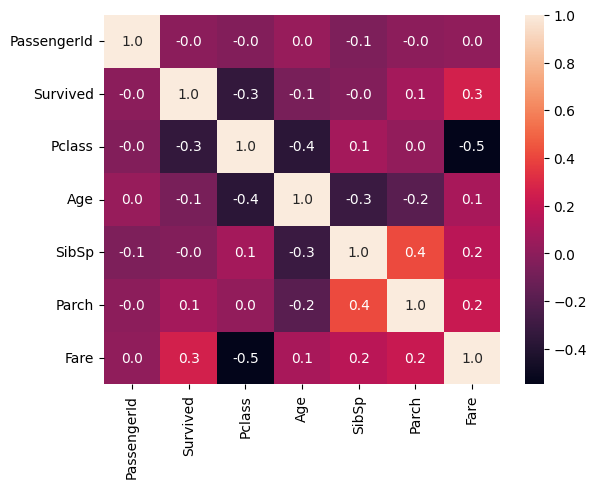

In [30]:
sns.heatmap(corr, annot=True, fmt='.1f', cbar=True)
plt.show()

*   상관계수 숫자값을 표시하면 칼럼 간의 상관계수를 좀 더 명확하게 확인 가능
*   칼럼들이 매우 많을 경우 활용도가 매우 높고, 어떤 피처들이 타깃값과 밀접한 상관관계를 가지는지 파악하여 해당 피처에 대한 엔지니어링 집중적으로 수행 / 피처들끼리 상관도가 매우 높다면 상호 간의 높은 종속관계를 의심하여 특정 피처들을 제거하는 용도로 사용

####04 정리


*   맷플롯립: pyplot 모듈의 중요 요소(Figure, Axes)차이 및 역할 - Figure는 그림을 그리기 위해 그림판의 크기를 조절하는 역할은 수행하지만 실질적으로 그림 그리는 역할은 Axes에서 수행
*   pyplot 모듈 plt.subplots( ) 함수로 여러 개의 서브플롯 생성 후 한 번에 시각화
*   시본: 맷플롯립보다 쉽게 다양한 시각화 차트 만들 수 있음, 판다스 DataFrame과 통합되어 추가 코딩 없이 축명이나 범례 등 자동으로 설정 가능

